In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

In [3]:
dirname = os.path.join(os.getcwd(),'C:\\devs\\datasets\\dataset50rotadofiltros2')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

<>:14: SyntaxWarning: invalid escape sequence '\.'
<>:14: SyntaxWarning: invalid escape sequence '\.'
C:\Users\ferco\AppData\Local\Temp\ipykernel_99276\2379502295.py:14: SyntaxWarning: invalid escape sequence '\.'
  if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):


leyendo imagenes de  C:\devs\datasets\dataset50rotadofiltros2\
C:\devs\datasets\dataset50rotadofiltros2\ferrari 1
C:\devs\datasets\dataset50rotadofiltros2\hummer 11320
C:\devs\datasets\dataset50rotadofiltros2\mclaren 11440
C:\devs\datasets\dataset50rotadofiltros2\porsche 11200
C:\devs\datasets\dataset50rotadofiltros2\vocho 11440
Directorios leidos: 5
Imagenes en cada directorio [11321, 11440, 11200, 11440, 11239]
suma Total de imagenes en subdirs: 56640


In [4]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Etiquetas creadas: ",len(labels))

Etiquetas creadas:  56640


In [5]:
cars=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    cars.append(name[len(name)-1])
    indice=indice+1

0 ferrari
1 hummer
2 mclaren
3 porsche
4 vocho


In [6]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8)

classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


In [7]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (45312, 50, 50, 3) (45312,)
Testing data shape :  (11328, 50, 50, 3) (11328,)


Text(0.5, 1.0, 'Ground Truth : 3')

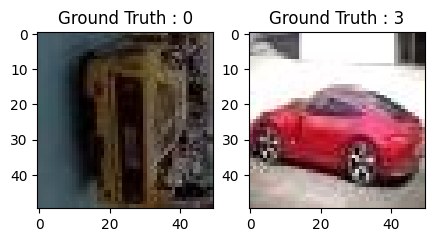

In [8]:
plt.figure(figsize=[5,5])

plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

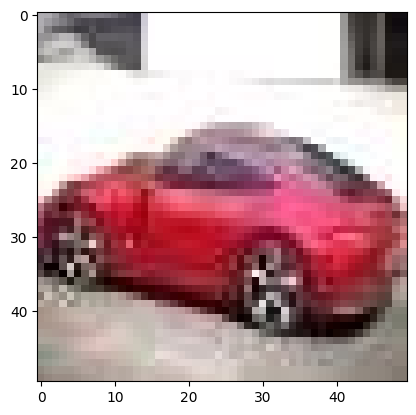

In [9]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

In [10]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0.]


In [11]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(36249, 50, 50, 3) (9063, 50, 50, 3) (36249, 5) (9063, 5)


In [58]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 5e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 50 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [59]:
car_model = Sequential()
car_model.add(Input(shape=(50, 50, 3)))
car_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same'))
car_model.add(LeakyReLU(negative_slope=0.1))
car_model.add(MaxPooling2D((2, 2), padding='same'))
car_model.add(Dropout(0.25))

car_model.add(Conv2D(64, kernel_size=(3, 3), activation='linear', padding='same'))
car_model.add(LeakyReLU(negative_slope=0.1))
car_model.add(MaxPooling2D((2, 2), padding='same'))
car_model.add(Dropout(0.25))

car_model.add(Flatten())
car_model.add(Dense(128, activation='linear'))
car_model.add(LeakyReLU(negative_slope=0.1))
car_model.add(Dropout(0.25))

car_model.add(Dense(nClasses, activation='softmax'))


In [60]:
car_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 50, 50, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 25, 25, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,404,613 (5.36 MB)

 Trainable params: 1,404,613 (5.36 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
car_model.compile(
    loss=keras.losses.categorical_crossentropy, 
    optimizer=tf.keras.optimizers.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),
    metrics=['accuracy']
)

C:\Users\ferco\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [62]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
# Entrenamiento del modelo
car_train = car_model.fit(
    train_X, 
    train_label, 
    batch_size=batch_size, 
    epochs=epochs, 
    verbose=1, 
    validation_data=(valid_X, valid_label)
)

Epoch 1/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 32s 54ms/step - accuracy: 0.2408 - loss: 1.5958 - val_accuracy: 0.3459 - val_loss: 1.5490
Epoch 2/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.3262 - loss: 1.5346 - val_accuracy: 0.3752 - val_loss: 1.4962
Epoch 3/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.3661 - loss: 1.4843 - val_accuracy: 0.4021 - val_loss: 1.4466
Epoch 4/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - accuracy: 0.3951 - loss: 1.4296 - val_accuracy: 0.4385 - val_loss: 1.3910
Epoch 5/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - accuracy: 0.4265 - loss: 1.3829 - val_accuracy: 0.4499 - val_loss: 1.3619
Epoch 6/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.4493 - loss: 1.3512 - val_accuracy: 0.4606 - val_loss: 1.3141
Epoch 7/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.4678 - loss: 1.3079 - val_accuracy: 0.5077 - val_loss: 1.2643
Epoch 8/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.4788 - loss: 1.2834 - 

In [79]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
car_model.save("C:\\devs\\IAProyects\\Proyecto CNN\\autos_modelos50x50mejorado3.h5")

In [64]:
test_eval = car_model.evaluate(test_X, test_Y_one_hot, verbose=1)

354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8789 - loss: 0.3630


In [65]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.362973690032959
Test accuracy: 0.8787076473236084


In [66]:
car_train.history

{'accuracy': [0.2691384553909302,
  0.3358161747455597,
  0.37076884508132935,
  0.40003862977027893,
  0.4317084550857544,
  0.45115727186203003,
  0.46922674775123596,
  0.48415127396583557,
  0.5009241700172424,
  0.5106347799301147,
  0.5263041853904724,
  0.5393252372741699,
  0.5508289933204651,
  0.5668018460273743,
  0.5780573487281799,
  0.5901404023170471,
  0.6071891784667969,
  0.6175894737243652,
  0.6278793811798096,
  0.6442936062812805,
  0.6503075957298279,
  0.6638528108596802,
  0.6739495992660522,
  0.6817843317985535,
  0.6939501762390137,
  0.7046263217926025,
  0.7114403247833252,
  0.725233793258667,
  0.7289028763771057,
  0.73866868019104,
  0.7447929382324219,
  0.7539242506027222,
  0.7619244456291199,
  0.7667521834373474,
  0.7726281881332397,
  0.781097412109375,
  0.7865044474601746,
  0.7930425405502319,
  0.8015945553779602,
  0.8066429495811462,
  0.8120499849319458,
  0.8162156343460083,
  0.8225606083869934,
  0.8277193903923035,
  0.830533266067504

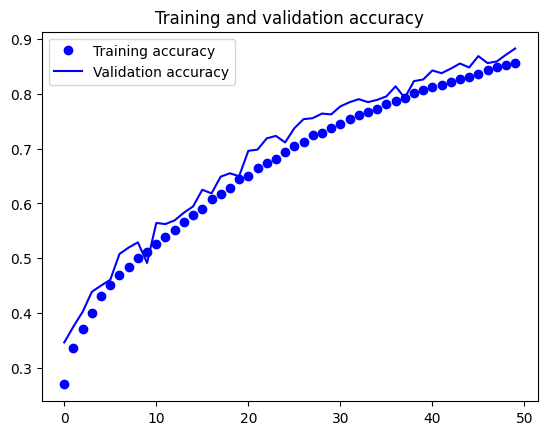

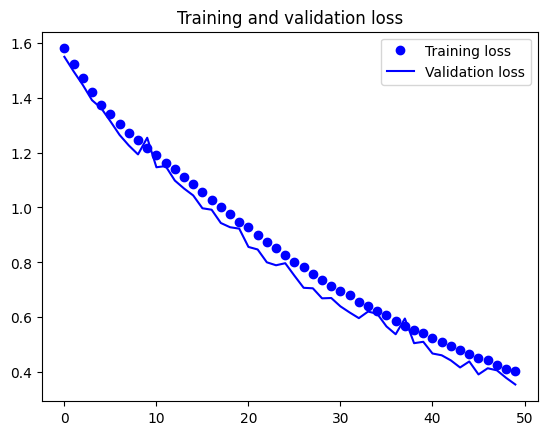

In [67]:
accuracy = car_train.history['accuracy']
val_accuracy = car_train.history['val_accuracy']
loss = car_train.history['loss']
val_loss = car_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [68]:
predicted_classes2 = car_model.predict(test_X)

354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [69]:
predicted_classes=[]
for predicted_car in predicted_classes2:
    predicted_classes.append(predicted_car.tolist().index(max(predicted_car)))
predicted_classes=np.array(predicted_classes)

In [70]:
predicted_classes.shape, test_Y.shape

((11328,), (11328,))

Found 9954 correct labels


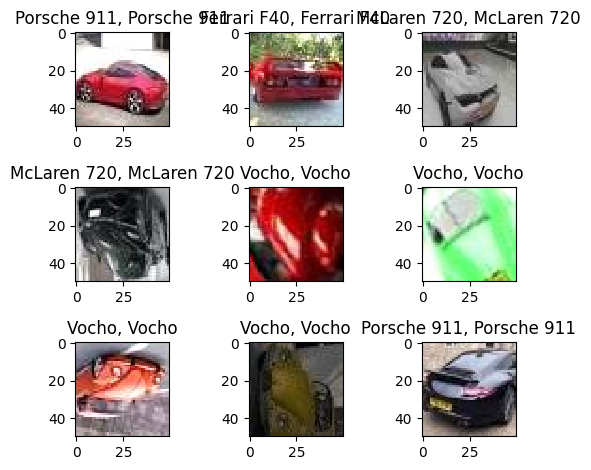

In [71]:
correct = np.where(predicted_classes == test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(50, 50, 3), interpolation='none')
    plt.title("{}, {}".format(cars[predicted_classes[correct]],
                                                   cars[test_Y[correct]]))

    plt.tight_layout()
plt.show()

Found 1374 incorrect labels


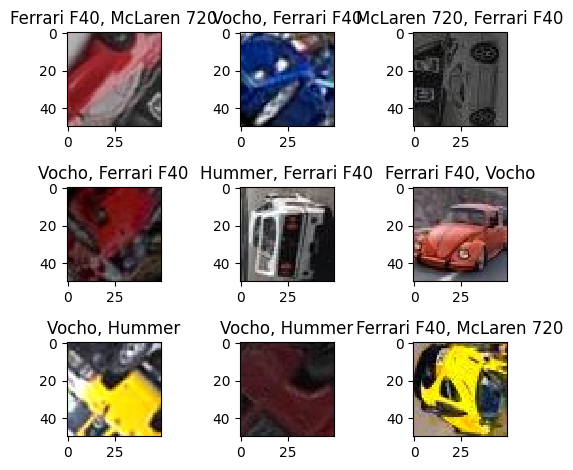

In [73]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(50,50,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(cars[predicted_classes[incorrect]],
                                                    cars[test_Y[incorrect]]))
    plt.tight_layout()

In [74]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.82      0.85      2321
     Class 1       0.93      0.91      0.92      2321
     Class 2       0.88      0.85      0.86      2192
     Class 3       0.82      0.90      0.86      2313
     Class 4       0.88      0.92      0.90      2181

    accuracy                           0.88     11328
   macro avg       0.88      0.88      0.88     11328
weighted avg       0.88      0.88      0.88     11328



In [80]:
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# Definir imágenes de prueba
filenames = ['C:\\devs\\IAProyects\\Proyecto CNN\\Imagenes prueba\\hummer.jpg']

# Cargar las clases de autos (asegúrate de definir correctamente "cars")
cars = ['Ferrari F40', 'Hummer', 'McLaren 720', 'Porsche 911', 'Vocho']

# Procesar las imágenes y hacer predicciones
images = []

for filepath in filenames:
    try:
        # Cargar imagen en formato RGB con OpenCV
        image = cv.imread(filepath)  # OpenCV carga en BGR por defecto
        if image is None:
            print(f"Error: No se pudo cargar la imagen {filepath}")
            continue
        
        # Convertir la imagen de BGR a RGB
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

        # Redimensionar la imagen a 50x50 usando OpenCV
        image_resized = cv.resize(image, (50, 50))

        # Normalizar la imagen al rango [0, 1]
        image_resized = image_resized.astype('float32') / 255.0

        # Agregar la imagen procesada a la lista
        images.append(image_resized)

    except Exception as e:
        print(f"Error al procesar la imagen {filepath}: {e}")

# Convertir las imágenes a formato numpy
X = np.array(images)

# Hacer predicciones con el modelo
predicted_classes = car_model.predict(X)

# Mostrar resultados y visualización
for i, pred in enumerate(predicted_classes):
    # Obtener la clase predicha
    pred_class_index = np.argmax(pred)
    pred_class = cars[pred_class_index]
    print(f"{filenames[i]} -> Predicción: {pred_class}")

    # Mostrar la imagen original con el texto de predicción
    img_color = cv.imread(filenames[i])
    if img_color is None:
        print(f"Error: no se pudo cargar la imagen {filenames[i]}")
    else:
        # Redimensionar para visualización (manteniendo proporción)
        h, w, _ = img_color.shape
        scale = 500 / max(h, w)
        new_size = (int(w * scale), int(h * scale))
        img_resized = cv.resize(img_color, new_size)

        # Dibujar la predicción en la imagen
        cv.putText(img_resized, f"El carro es: {pred_class}", (10, 30), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Mostrar la imagen con la predicción
        cv.imshow(f"Predicción para {filenames[i]}", img_resized)
        cv.waitKey(0)
        cv.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
C:\devs\IAProyects\Proyecto CNN\Imagenes prueba\hummer.jpg -> Predicción: Hummer


284/284 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


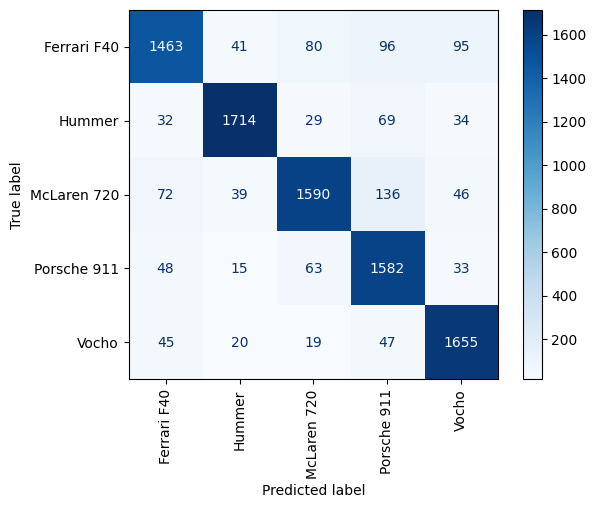

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = np.argmax(car_model.predict(valid_X), axis=1)
y_true = np.argmax(valid_label, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cars)
disp.plot(cmap='Blues', xticks_rotation='vertical')
